In [1]:
import matplotlib.pyplot as plt
from dgf import DualPopulationMetal
import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
data = Table.read("alldata_UMi.fits")
m = (np.abs(data["FEH"])  < 50) & (np.abs(data["VCORR"])  < 1e10)
hrv = data["VCORR"][m]
dhrv = data["VCORR_ERR"]
feh = data["FEH"][m]
dfeh = data["FEH_ERR"]

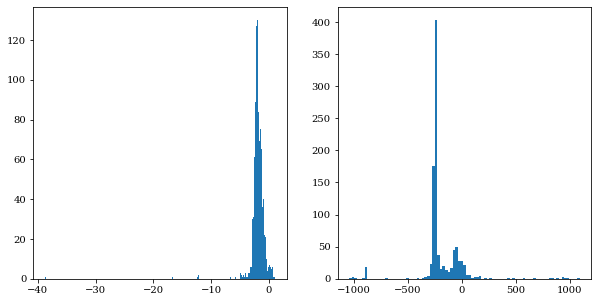

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].hist(data["FEH"][m], bins="auto")
ax[1].hist(data["VCORR"][m], bins="auto")
plt.show()

Optimization terminated successfully.
{'pgal': 0.6094345145952059, 'gal_hrv': -245.28060323593076, 'gal_vsig': 11.314754030449674, 'gal_feh': -1.952955597451495, 'gal_fehsig': 0.3999999999996927, 'mw_hrv': -271.56230846859745, 'mw_vsig': 377.6306936289335, 'mw_feh': -0.05484199373050628, 'mw_fehsig': 3.021736362725751}


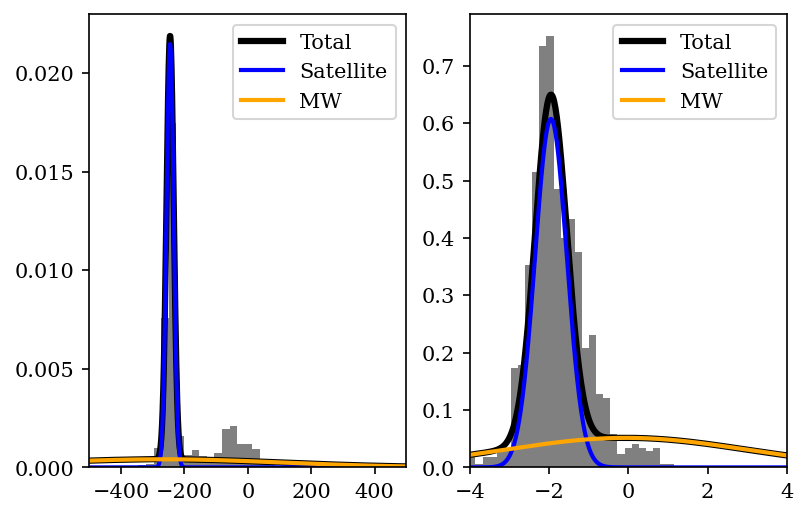

In [4]:
fitter = DualPopulationMetal([.5, -300, 50, -1.8, .1, 90, 100, -.5, 4], hrv, np.zeros(len(hrv)), feh, np.zeros(len(feh)))

def assign_key(arr):
        return {
                "pgal": arr[0],

                "gal_hrv": arr[1],
                "gal_vsig": arr[2],
                "gal_feh": arr[3],
                "gal_fehsig": arr[4],

                "mw_hrv": arr[5],
                "mw_vsig": arr[6],
                "mw_feh": arr[7],
                "mw_fehsig": arr[8]
        }

theta = [.8, -300, 20, -1.8, .03, -40, 100, 0, 4]

popt = fitter.getOptimalValues(theta)
print(assign_key(popt))
fitter.project_model(popt, rvmin=-500, rvmax=500, fehmin=-4, fehmax=4)

In [5]:
fitter.run(20, popt)

  0%|          | 0/200 [00:00<?, ?it/s]/Users/jaybaptista/opt/miniconda3/envs/research/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [00:48<00:00, 103.37it/s]


(array([[   0.56916968, -245.28163136,   10.17910139,   -1.99684351,
            0.3967539 , -107.99513471,  308.24618529,   -1.60580316,
            2.56178255],
        [   0.60052016, -244.99983045,   10.84165232,   -1.99882881,
            0.3934848 , -135.97502624,  295.81636267,   -1.56477746,
            2.56560763],
        [   0.58764119, -244.86111213,   10.55162074,   -1.99797245,
            0.39566012, -122.90553001,  316.18332707,   -1.51364368,
            2.4233469 ],
        [   0.59792594, -245.01239952,   10.57922756,   -1.99202548,
            0.39761519,  -78.80796483,  309.21866297,   -1.82859243,
            2.5279797 ],
        [   0.59610094, -246.09759708,   10.13694584,   -1.99778137,
            0.39737922, -115.98811604,  293.7598779 ,   -1.70635622,
            2.44689465],
        [   0.61092075, -244.87971625,   10.89529076,   -1.99319374,
            0.39925425, -119.02124373,  301.40379639,   -1.79549949,
            2.44845893],
        [   0.57787782

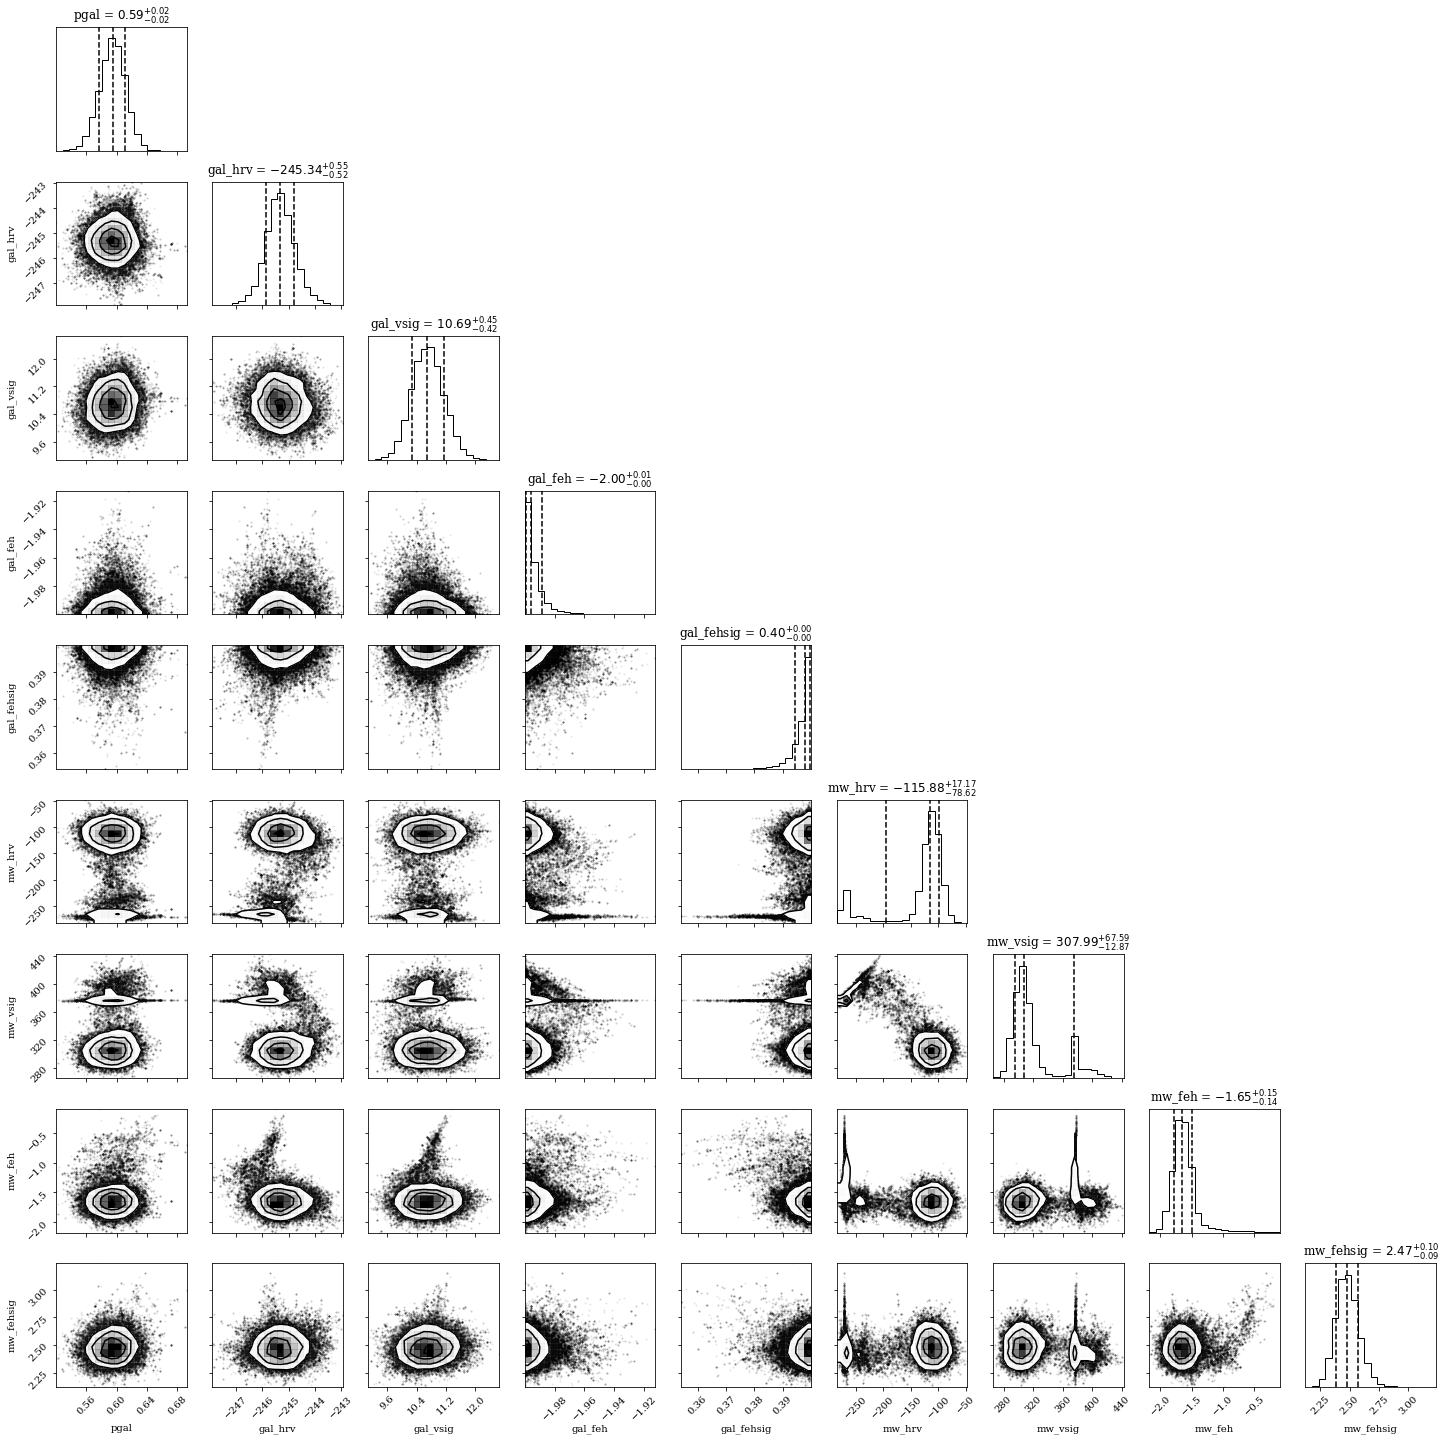

In [6]:
fitter.plot()